In [135]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

# data analysis / manipulation
import numpy as np
import pandas as pd
import re

# statistics
from scipy import stats

# machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
git adfrom sklearn.metrics import accuracy_score

In [136]:
test_df = pd.read_csv(r'C:\Users\Gareth\Desktop\Python_NEW\Datasets\Titanic\test.csv')
train_df = pd.read_csv(r'C:\Users\Gareth\Desktop\Python_NEW\Datasets\Titanic\train.csv')

In [137]:
combined_df = pd.concat([train_df, test_df])

In [138]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Based on the dataset, we can assign the columns to the following features, and work with them appropiately.

- Numerical Features: Age, Fare, SibSp and Parch
- Categorical Features: Survived, Sex, Embarked, Pclass
- Alphanumeric Features: Ticket, Cabin

In [139]:
train_df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sunderland, Mr. Victor Francis",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [140]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [141]:
train_df.Name.unique().size

891

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

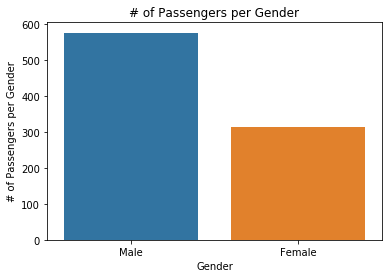

In [142]:
ax = sns.barplot(x = train_df.Sex.value_counts().index, y = train_df.Sex.value_counts().values)
ax.set(xlabel = 'Gender', ylabel = '# of Passengers per Gender', title = '# of Passengers per Gender')
ax.set_xticklabels(['Male','Female'])

### Conclusions So Far: 
- There are a total of 891 passengers in our training dataset.
- The majority of the data in the Cabin column is missing. This information will be hard to reverse engineer given the large number of unique values in the dataset.
- Some (20%~) of the Age dataset is missing. This will be easier to fill in the blanks by using statistics based on the mode of the passengers age. 

### Data Visualization

[Text(0, 0, 'Did Not Survive'), Text(0, 0, 'Survived')]

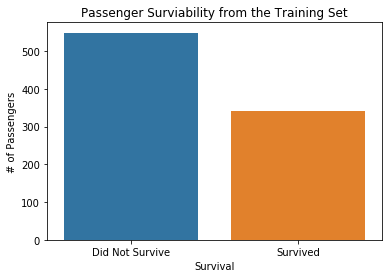

In [143]:
ax = sns.barplot(x = train_df.Survived.value_counts().index, y = train_df.Survived.value_counts().values)
ax.set(xlabel = 'Survival', ylabel = '# of Passengers', title = 'Passenger Surviability from the Training Set')
ax.set_xticklabels(['Did Not Survive','Survived'])

[Text(0, 0, 'Did Not Survive'), Text(0, 0, 'Survived')]

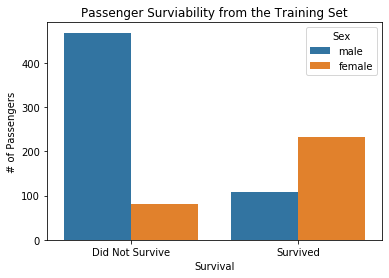

In [144]:
ax = sns.countplot(x = 'Survived', hue = 'Sex', data = train_df)
ax.set(xlabel = 'Survival', ylabel = '# of Passengers', title = 'Passenger Surviability from the Training Set')
ax.set_xticklabels(['Did Not Survive','Survived'])

Here, we calculate the size of the families on board the ship. A familysize of 1 indicates that person did not have any Siblings or Children listed on the passenger manifest.

In [145]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1 

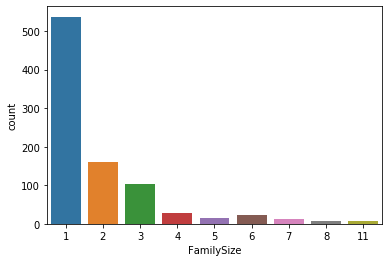

In [146]:
sns.countplot(train_df['FamilySize'])

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Age'),
 Text(0.5, 1.0, 'Distribution of Passengers by Age')]

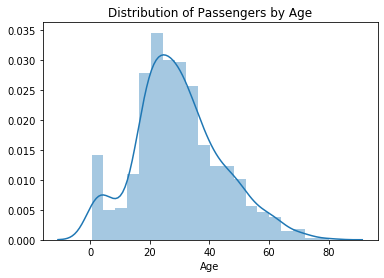

In [147]:
ax = sns.distplot(train_df.Age)
ax.set(xlabel = 'Age', ylabel = '', title = 'Distribution of Passengers by Age')

[Text(0, 0.5, 'Dist'),
 Text(0.5, 0, 'Fare (Shillings/Pounds)'),
 Text(0.5, 1.0, 'Distribution of Passengers Fares')]

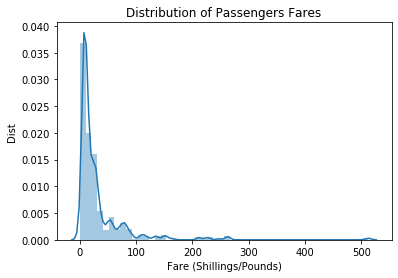

In [148]:
ax = sns.distplot(train_df.Fare)
ax.set(xlabel = 'Fare (Shillings/Pounds)', ylabel = 'Dist', title = 'Distribution of Passengers Fares')

Converting the Fare value from Pounds (1912 prices) to post decimalisation values. 
- Current price index for GBP as of 2020 = 126.06 
- Index price for GBP as of 1998 = 91.1
- Price index for GBP as of  1912 = 9.7

To establish a scale we use two sets of indices. This establishes the 1998 price index

In [149]:
(train_df.Fare.max()/91.1)*(91.1)

512.3292

This establishes the 2020 price index

In [150]:
(train_df.Fare.max()/91.1)*(126.06)

708.9376394291988

Finally we assigned the percentage difference in price index, between 1912 and 2020 to a variable, so that we can multiple the Fare index by this.

In [151]:
adjusted = 708.94/9.7
adjusted

73.08659793814434

The general price level of the UK is 73 times as high as it was in 1912.

In [152]:
train_df['Fare_2020'] = train_df.Fare * adjusted

[Text(0, 0.5, 'Dist'),
 Text(0.5, 0, 'Fare (£)'),
 Text(0.5, 1.0, 'Distribution of Passengers Fare (2020 Prices)')]

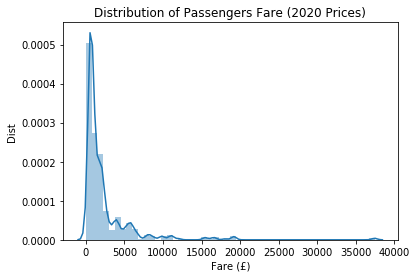

In [153]:
ax = sns.distplot(train_df.Fare_2020)
ax.set(xlabel = 'Fare (£)', ylabel = 'Dist', title = 'Distribution of Passengers Fare (2020 Prices)')

Adjusting the fare has no effect upon the distribution as we'd expect, however it is interesting from a perspective how much a fare would cost in today's pricing.

I was also curious to understand who paid for the most expensive ticket.

In [154]:
train_df.loc[train_df.Fare_2020.idxmax()]

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                          35
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                    512.329
Cabin                       NaN
Embarked                      C
FamilySize                    1
Fare_2020               37444.4
Name: 258, dtype: object

### Survival Relative to Age

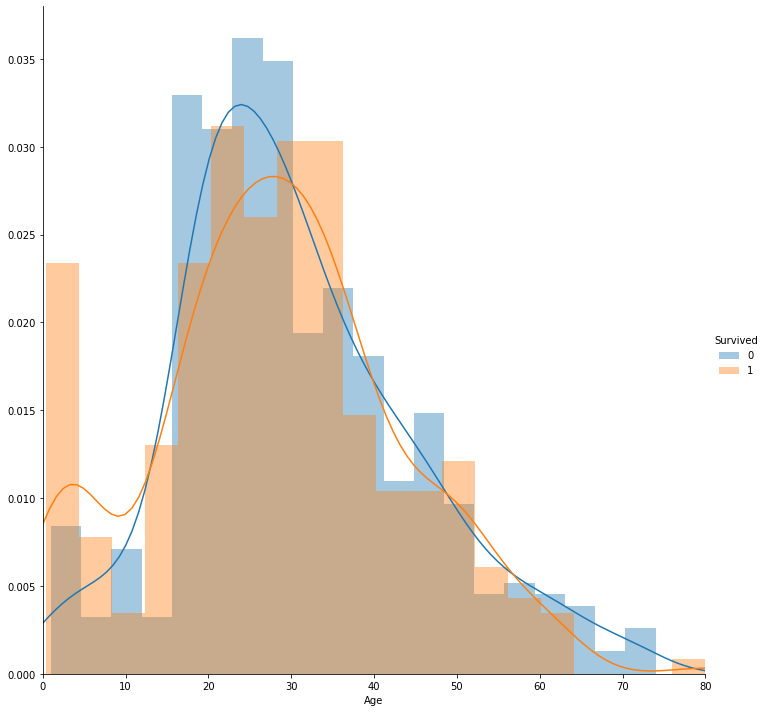

In [155]:
# Here we plot a Facet Grid. This illustrates the likelihood of survival relative to age. As you can see there the difference between surviving and not surviving didn't really depend on age, unless you were between the ages of 0 - 15, indicating that the advice of "Women and Children first", was followed. 

facet = sns.FacetGrid(train_df, hue = 'Survived', height = 10)
facet.map(sns.distplot, 'Age', bins = 20)
facet.set(xlim = (0, train_df['Age'].max()))
facet.add_legend()

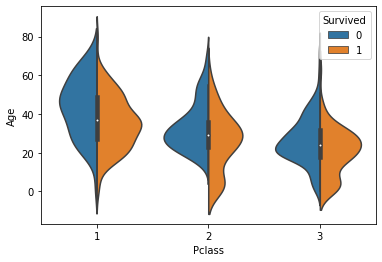

In [156]:
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train_df, split = True)

### Survival based on Point of Embarkation relative to Gender

[Text(0, 0, 'Southampton'), Text(0, 0, 'Cherbourg'), Text(0, 0, 'Queenstown')]

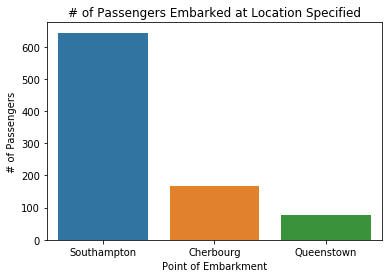

In [157]:
ax = sns.barplot(x = train_df.Embarked.value_counts().index, y = train_df.Embarked.value_counts().values)
ax.set(xlabel = 'Point of Embarkment', ylabel = '# of Passengers', title = '# of Passengers Embarked at Location Specified')
ax.set_xticklabels(['Southampton','Cherbourg','Queenstown'])

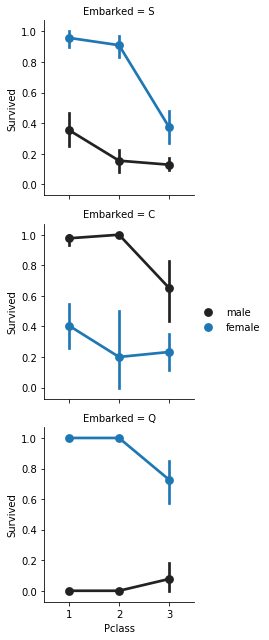

In [158]:
fg = sns.FacetGrid(train_df, row = 'Embarked')
fg.map(sns.pointplot, 'Pclass','Survived','Sex')
fg.add_legend()

- We can conclude that overall, you're more likely to survive if you're female embarking onto the Titanic in Southhampton and Queenstown. 
- Particularly if you're in class 1 and class 2. 
- Men embarking in Cherbourg had a uncommonly high rate of survival. 

### Survivability relative to Gender

In [159]:
gender_age = train_df[['Age','Sex','Survived']]

In [160]:
gender_age.dropna(inplace = True)

In [161]:
gender_dummies = pd.get_dummies(gender_age['Sex'])
gender_dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [162]:
gender_age_dummies = gender_age.join(gender_dummies)
gender_age_dummies

,Age,Sex,Survived,female,male
0,22.0,male,0,0,1
1,38.0,female,1,1,0
2,26.0,female,1,1,0
3,35.0,female,1,1,0
4,35.0,male,0,0,1
...,...,...,...,...,...
885,39.0,female,0,1,0
886,27.0,male,0,0,1
887,19.0,female,1,1,0
889,26.0,male,1,0,1


In [163]:
survival_gender = gender_age_dummies.groupby('Survived')[['female','male']].mean()
survival_gender

,female,male
Survived,,
0,0.150943,0.849057
1,0.679310,0.320690


The heatmap below illustrates the probability of survival based on gender. As you can see, generally, Female passengers had a higher rate of survival (0.68), whilst Male passengers had a higher rate of not surviving (0.85). 

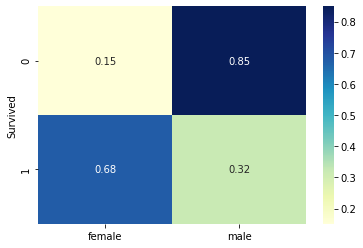

In [164]:
sns.heatmap(survival_gender, annot = True, cmap = "YlGnBu")

### Effect of "Title" on Survivability

Here, I extracted all the titles from the "Name" column and assigned it to a brand new column entitled "Titles". 

In order to group the titles together better, and to establish wherever the title of the person may have an effect of their surviability (this is in a sense linked to both gender and class). I denoted the minimum number of persons required to be a common class as 10, and all others were classified as "Other".

In [165]:
combined_df['Titles'] = combined_df.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [166]:
min_count = 10
title_names = (combined_df['Titles'].value_counts() < min_count)

There's a large number of different titles, however the most common were Mr, Miss, Mrs and Master. Interestingly a "Jonkheer" is a rank of nobility in the Netherlands.

In [167]:

combined_df['Titles'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Mme           1
Jonkheer      1
Dona          1
Countess      1
Lady          1
Capt          1
Sir           1
Don           1
Name: Titles, dtype: int64

In [168]:
combined_df['Titles'] = combined_df['Titles'].apply(lambda x: 'Other' if title_names.loc[x] == True else x)

In [169]:
combined_df['Titles'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: Titles, dtype: int64

As expected, those with a Mr title, tend to have the lower likelihood of survivability, whilst Mrs / Miss and Master's are generally higher. The variability of the "Other" titles is likely due to the fact that they're 1) more uncommon, so the signifiance of their title in relation to their surviability isn't so well correlated, 2) some titles are gender specific, ie: Countess, so it's likely, based on our previous analysis, that this passenger was more likely to survive.

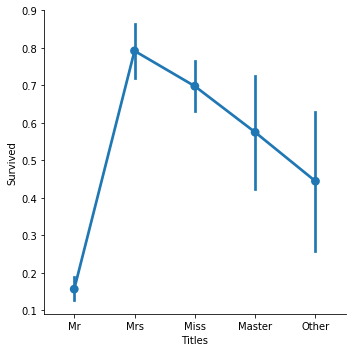

In [170]:
sns.factorplot('Titles', 'Survived', data = combined_df)

### Overall Correlations Between Columns

In [171]:
combined_df.drop(columns = 'PassengerId', inplace = True)

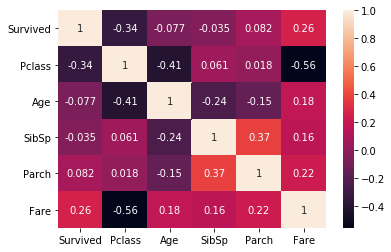

In [172]:
sns.heatmap(combined_df.corr(), annot = True)

Based on the fact that there is a high correlation between the passenger class and the Age, we can attempt to fill our NaN values for the Age with respect to the Passenger Class median age. 

In [173]:
combined_df['Age'] = combined_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

In [174]:
combined_df.isna().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
Titles         0
dtype: int64

Likewise, given that there are very few values missing for Fare and Embarked. For Fare we can achieve this by taking the mode value. For Embarked, We will impliment this later once we have converted the Embarked columns into scalar values. 

In [175]:
combined_df['Fare'].fillna(combined_df['Fare'].mode()[0], inplace = True)

In [176]:
combined_df.isna().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       2
Titles         0
dtype: int64

# Data Cleaning for ML

Our dataset is split into TRAIN and TEST dataset. Lets compare them.

In [177]:
print(train_df.info())
print("----------------")
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  Fare_2020    891 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 97.6+ KB
None
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count 

For the purposes of machine learning, I need to convert the elements of our dataset from strings into numerical values. For example, converting Gender from Male / Female to 0 or 1. This allows for the application of statistics on "string" based values.

In [178]:
combined_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [179]:
title_category = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Other':5}

combined_df['Titles'] = combined_df['Titles'].map(title_category)

combined_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [180]:
gender_category = {"male": 0, "female": 1}

combined_df['Sex'] = combined_df['Sex'].map(gender_category)

combined_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


In [181]:
embarkment_category = {"S": 0, "C": 1, "Q": 2}

combined_df['Embarked'] = combined_df['Embarked'].map(embarkment_category)

combined_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,3
2,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,2
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,3
4,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,1


In [182]:
combined_df['Embarked'].fillna(method = 'bfill', inplace = True)

In [183]:
combined_df.isna().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       0
Titles         0
dtype: int64

Here we add an additional column called Family Size which denotes the size of the family based on the SibSp and Parch columns. 

In [184]:
combined_df['FamilySize'] = combined_df['SibSp'] + combined_df['Parch'] + 1

In [185]:
combined_df = combined_df.drop(columns = ['SibSp','Parch','Ticket','Name','Cabin'])

Normalizing with MinMax both the Age and Fare columns will improve our analysis. 

In [186]:
combined_df['Fare'] = (combined_df['Fare'] - combined_df['Fare'].mean())/(combined_df['Fare'].max() - combined_df['Fare'].min())

In [187]:
combined_df['Age'] = (combined_df['Age'] - combined_df['Age'].mean())/(combined_df['Age'].max() - combined_df['Age'].min())

In [188]:
test = combined_df[combined_df['Survived'].isna()].drop(['Survived'], axis = 1)

In [189]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Titles,FamilySize
0,3,0,0.066297,-0.049669,2.0,1,1
1,3,1,0.222879,-0.051288,0.0,3,2
2,2,0,0.410779,-0.046042,2.0,1,1
3,3,0,-0.027653,-0.048043,0.0,1,1
4,3,1,-0.090286,-0.040967,0.0,3,3


In [190]:
train = combined_df[combined_df['Survived'].notna()]

In [191]:
train['Survived'] = train['Survived'].astype(np.int8)

In [192]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Titles        0
FamilySize    0
dtype: int64

- Without dataset now clean, we can proceed with the Machine Learning.

# Machine Learning

In [193]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'], axis = 1), train['Survived'], test_size = 0.2, random_state = 42)

In [194]:
X_train.shape, y_train.shape, X_test.shape

((712, 7), (712,), (179, 7))

## Logistic Regression

Using logistic regression, we can measure the relationship between the a depedent variable and the independent variables by estimatic their probabilities. 

In [195]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
y_pred = logreg.predict(X_test)

In [197]:
logistic_acc = round(accuracy_score(y_pred, y_test)*100, 2)
print(logistic_acc)

84.36


Here we Correlation Estimate for each feature from the Logistic Regression. 

[Text(0, 0, 'Sex'),
 Text(0, 0, 'Fare'),
 Text(0, 0, 'Titles'),
 Text(0, 0, 'Embarked'),
 Text(0, 0, 'FamilySize'),
 Text(0, 0, 'Pclass'),
 Text(0, 0, 'Age')]

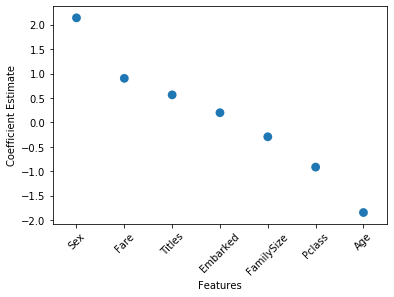

In [128]:
correl = pd.DataFrame(combined_df.columns.delete(0))
correl.columns = ['Features']
correl["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
correl = correl.sort_values(by = 'Coefficient Estimate', ascending = False)
correl = correl.astype({'Features': str, 'Coefficient Estimate': float})
g = sns.pointplot(x = correl.Features, y = correl['Coefficient Estimate'], join = False)
g.set_xticklabels(labels = correl.Features, rotation = 45)

- As we can see, and as I stipulated, Sex (Gender) has the greatest impact on the likelihood of your survival. This matches our earlier predictions indicating that if you're female, your likelihood of survival is greater than a male. 
- Conversely, as your Age increases, the likelihood of your survival also decreases, which matches our earlier predictions.
- The higher your fare, and the higher your class, resulted in a higher chance of survival.
- The point of your embarkation makes little difference to the overall likelihood of survial. 

## Random Forest

In [133]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

random_forest_accuracy = round(random_forest.score(X_train, y_train)*100,2)
print(random_forest_accuracy)

98.31


## Guessian Naive Bayes

In [96]:
guassian = GaussianNB()
guassian.fit(X_train, y_train)
y_pred = guassian.predict(X_test)
guassian_acc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(guassian_acc)

77.09


## Support Vector Machines (SVC)

In [98]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_acc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(svc_acc)

82.68


## Linear SVC

In [99]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
linear_svc_acc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(linear_svc_acc)

79.33


## K Nearest Neighbors

In [129]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(knn_acc)

82.68


In [200]:
models = pd.DataFrame({
    
    'Model':
                        ['Logistic Regression',
                        'Random Forest',
                        'SVC',
                        'Linear SVC'
                        'KNN'],
    'Score':
                        [logistic_acc,
                        random_forest_accuracy,
                        svc_acc,
                        linear_svc_acc,
                        knn_acc]})
                        
models.sort_values(by = 'Score', ascending = False)

ValueError: arrays must all be same length

In [202]:
len(logistic_acc)
                        

TypeError: object of type 'numpy.float64' has no len()